# Challenge 5

In this challenge, we will practice on dimensionality reduction with PCA and selection of variables with RFE. We will use the _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), originally containing 89 variables from over 18,000 FIFA 2019 _game_ players.

## _Setup_ 

In [7]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [8]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [11]:
fifa = pd.read_csv("fifa.csv")

In [12]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [29]:
# fill nan's with the mean in each column
fifa = fifa.fillna(fifa.mean())

0.5652676537694244

## Question - 01

Which fraction of the variance can be explained by the first main component of `fifa`? Respond as a single float (between 0 and 1) rounded to three decimal places.

In [31]:
# Question - 01
# Instancing PCA with no arguments means that all features will be considered.
# This definition will be used for all questions about PCA.
pca = PCA()
pca.fit(fifa)

# The explained_variance_ratio_ returns a np array with all explained variance, where the first value is equivalent to the first
# principal component.
exp_var_first = round(pca.explained_variance_ratio_[0], 3)

In [32]:
def q1():
    return exp_var_first

## Question - 02

How many major components do we need to explain 95% of the total variance? Answer as a single integer scalar.

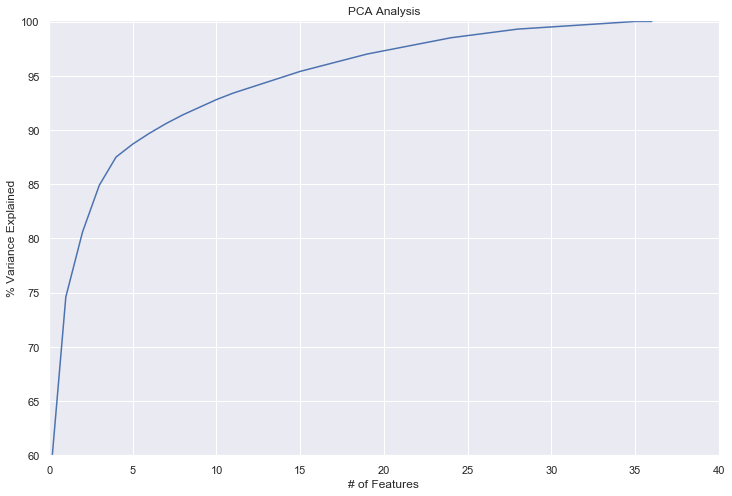

In [93]:
# Question - 02

cumulative_expvar = np.cumsum(np.round(pca.explained_variance_ratio_, 3))
pca_095 = cumulative_expvar[cumulative_expvar <= 0.95]
n_pca_095 = pca_095.shape[0]

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xlim(0,40)
plt.ylim(60,100.1)
plt.style.context('seaborn-whitegrid')


plt.plot(cumulative_expvar * 100);

In [94]:
def q2():
    return n_pca_095

## Question - 03

What are the coordinates (first and second main components) of the `x` point below? The vector below is already centered. Be careful to __not__ center the vector again (for example, by invoking `PCA.transform ()` on it). Respond as a float tuple rounded to three decimal places.

In [95]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [96]:
# Question - 03
# Applying pca.components_ to x vector to obtain all coordinates based on PCA fitted with fifa columns.
# Selecting just firts two components we obtain the first and second coordinates of principal components.
x_y_PCA = np.round(pca.components_.dot(x)[:2], 3)

In [97]:
def q3():
    # Python already returns a tuple when passed more than one value.
    return x_y_PCA[0], x_y_PCA[1]

## Question - 04

Performs RFE with linear regression estimator to select five variables, eliminating them one by one. What are the selected variables? Respond as a list of variable names.

In [121]:
# Creating a linear regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Obtain X_train
X_train = fifa[fifa.columns[fifa.columns != 'Overall']]

# Obtain y_train
y_train = fifa['Overall']

reg.fit(X_train, y_train);

In [120]:
# Applying RFE analysis

from sklearn.feature_selection import RFE

rfe = RFE(reg)
rfe.fit(X_train,y_train);

In [122]:
# Creating a support Data Frame to analyze RFE results
# column = Column with all features names
# bool = Column with True or False values where True represents the variables that most affect the prediction
# coef = Column that represents the impact of each variable in the prediction
rfe_features = pd.DataFrame({'column': X_train.columns,
             'bool': rfe.get_support(),
             'coef': pd.Series(reg.coef_)})

# Strategy from greek...
# Creating a Data Frame with the variables with bool equals True
# Sort this new Data Frame by coef in descending order
# Get the first five values from column

only_true_rfe = rfe_features[rfe_features['bool'] == True].sort_values(by='coef', ascending=False)
most_important_features = only_true_rfe.iloc[:5]['column']

In [123]:
def q4():
    # In this case, most_important_features is a pandas series object, remember to transform it into a list using .tolist() 
    # method.
    return most_important_features.tolist()